# Libraries

In [1]:
#Data preprocessing
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#Machine learning
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data preprocessing and EDA

In [141]:
df_raw = pd.read_csv('Data.csv')
df_raw.head(2)

,Class,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2,1000025,5,1,1,1,2,1,3,1,1
1,2,1002945,5,4,4,5,7,10,3,2,1


In [142]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Class                        683 non-null    int64
 1   Sample code number           683 non-null    int64
 2   Clump Thickness              683 non-null    int64
 3   Uniformity of Cell Size      683 non-null    int64
 4   Uniformity of Cell Shape     683 non-null    int64
 5   Marginal Adhesion            683 non-null    int64
 6   Single Epithelial Cell Size  683 non-null    int64
 7   Bare Nuclei                  683 non-null    int64
 8   Bland Chromatin              683 non-null    int64
 9   Normal Nucleoli              683 non-null    int64
 10  Mitoses                      683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [143]:
df_raw.describe(include='all')

,Class,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2.699854,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,2.000000,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,4.000000,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,4.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [144]:
df = df_raw.copy()
col = df.columns.values

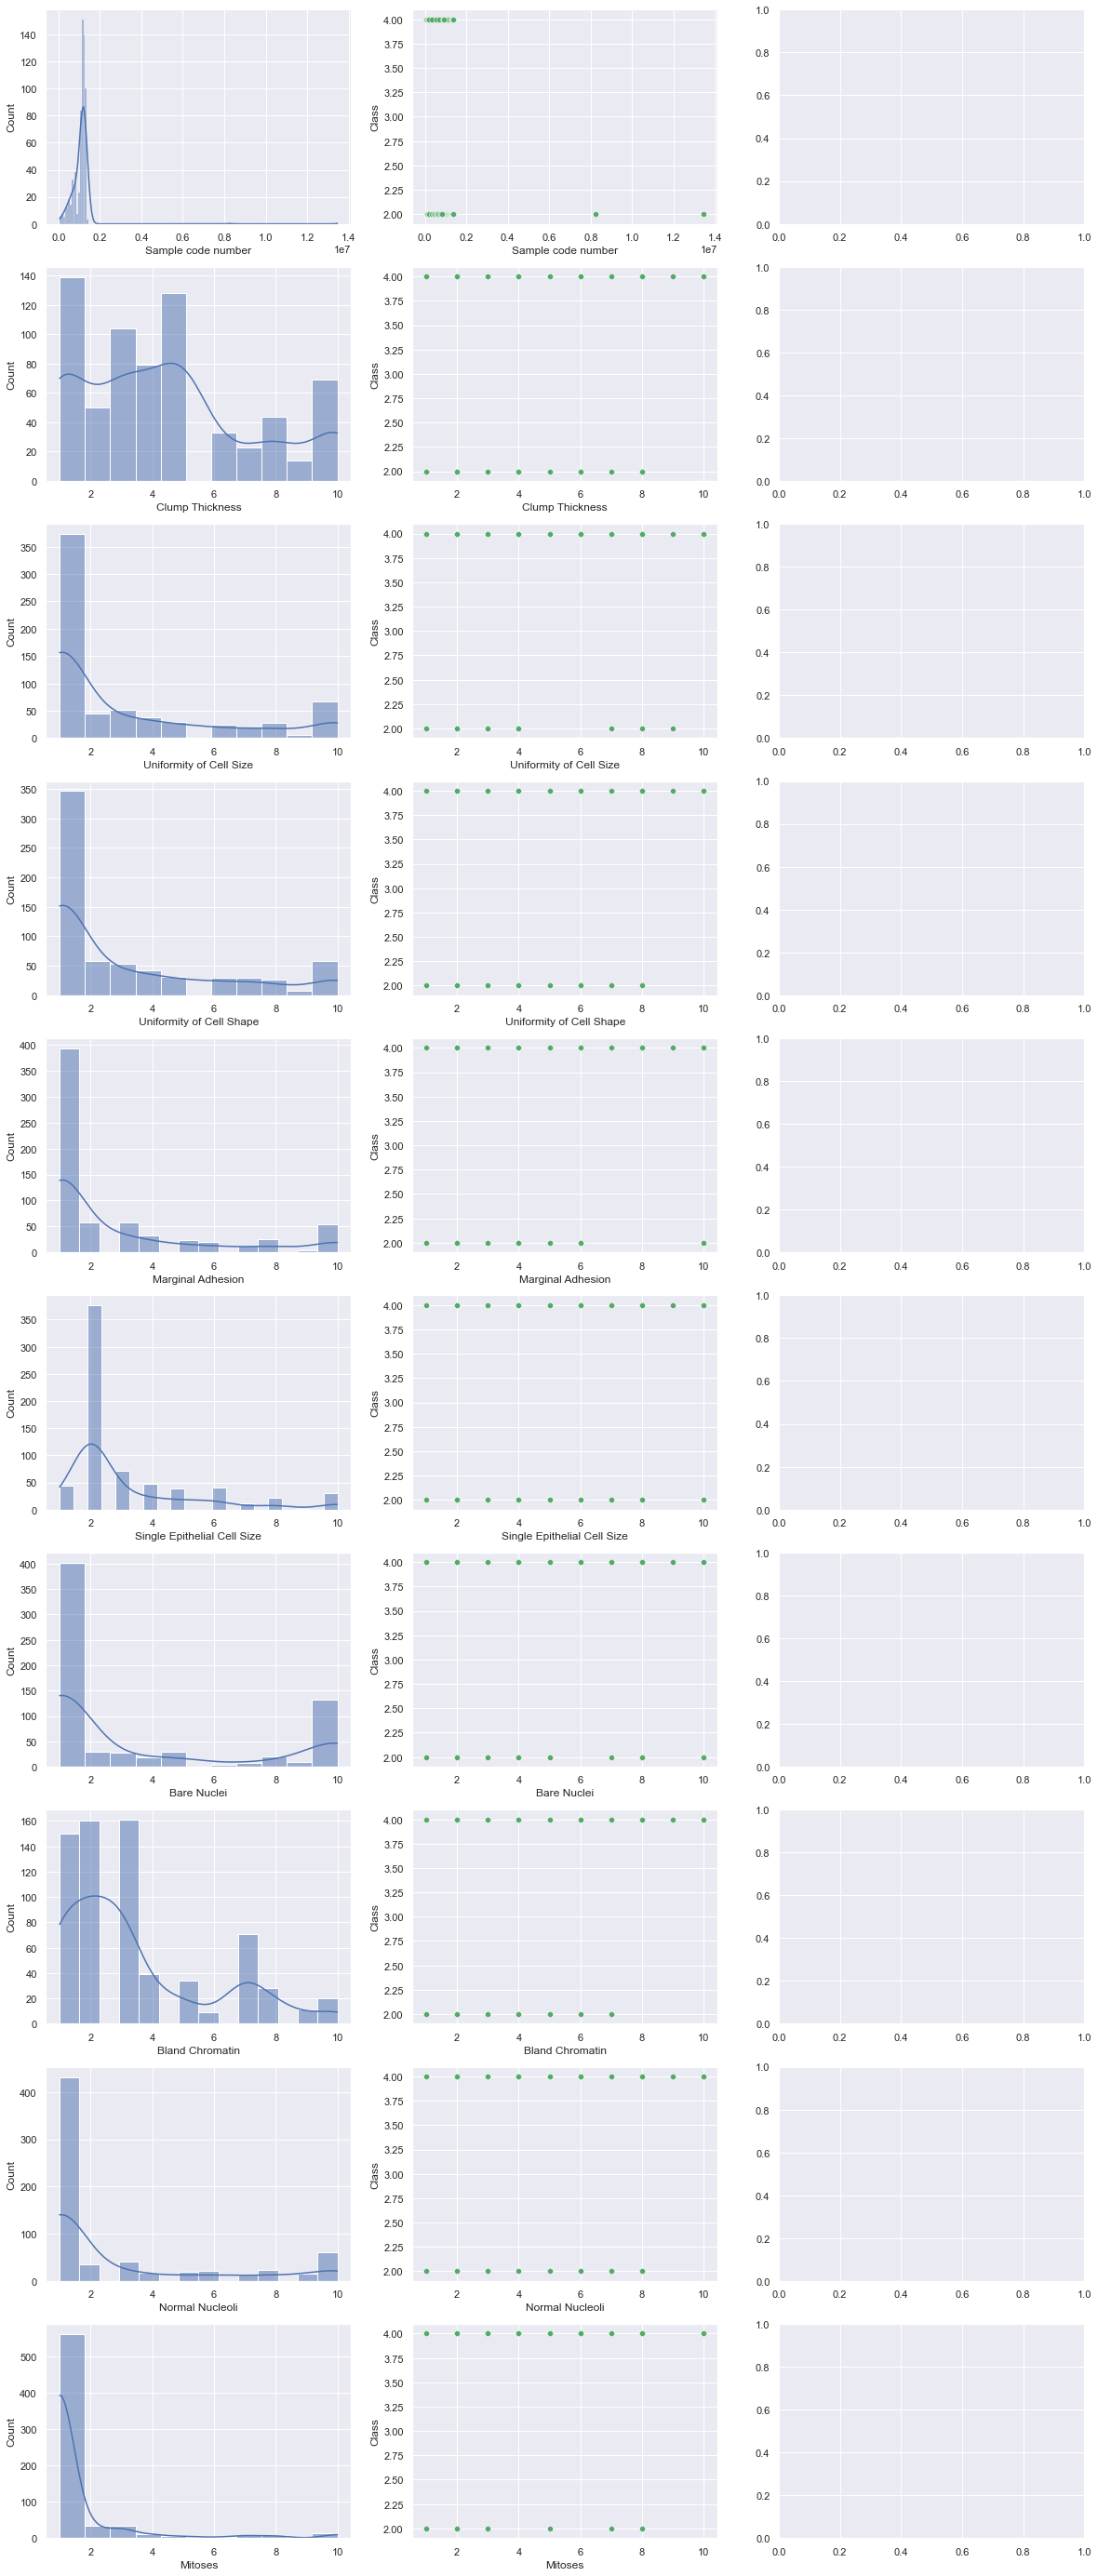

In [145]:
#visualizing and transforming features
fig,ax = plt.subplots(nrows=(len(col)-1),ncols=3,figsize=(20,50));
for i in range (1,len(col),1):
    sb.histplot(data=df.iloc[:,i],kde=True,ax=ax[i-1,0])
    sb.scatterplot(data=df,x=col[i],y=col[0],ax=ax[i-1,1],color='g');

#drawing the final features transformations
#ax[0,2].scatter(np.log(df['CRIM']),df['MEDV'],color='r');

In [146]:
#trying some feature transformations

#fig,f = plt.subplots(nrows=1,ncols=2,figsize=(10,5));
#f[0].scatter(df['V'],df['PE'],color='g');
#f[1].scatter(1/(df['V']),df['PE'],color='r');

In [147]:
Y = df[col[0:1]]
X = df[col[1:]]

# Splitting data

In [148]:
#important to set the random state
x_tr, x_ts = train_test_split(X,train_size=0.9,test_size=0.1,random_state=0)
y_tr, y_ts = train_test_split(Y,train_size=0.9,test_size=0.1,random_state=0)

In [149]:
sc_x = StandardScaler()
x_tr_sc = sc_x.fit_transform(x_tr)
x_ts_sc = sc_x.transform(x_ts)

# Multicolinearity & F regression for all features

In [150]:
df_features = pd.DataFrame()
df_features['Feature'] = list(x_tr.columns)
df_features['P-value'] = f_regression(x_tr,y_tr.values.ravel())[1]
df_features['P-value2'] = df_features['P-value'].round(4)
df_features.sort_values(by='P-value2')

,Feature,P-value,P-value2
1,Clump Thickness,7.676481e-96,0.0000
2,Uniformity of Cell Size,4.142546e-148,0.0000
3,Uniformity of Cell Shape,5.414726e-147,0.0000
4,Marginal Adhesion,1.524526e-93,0.0000
5,Single Epithelial Cell Size,1.509064e-88,0.0000
6,Bare Nuclei,1.333950e-149,0.0000
7,Bland Chromatin,4.077232e-113,0.0000
8,Normal Nucleoli,1.573842e-100,0.0000
9,Mitoses,1.249211e-27,0.0000
0,Sample code number,2.671318e-02,0.0267


**the feautre (Sample code number) has highest p-value which indicates that we can accept the null that such feature has low correlation with the predicted variable** </br>
**It seems logic, that feature (Sample code number) is an ID and doesn't reflect any of sample characteristics**

In [151]:
x_tr.columns
col_adj = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
x_tr_adj = x_tr[col_adj]
m = pd.DataFrame(x_tr_sc,columns=col[1:])
x_tr_sc_adj = m[col_adj]

x_ts_adj = x_ts[col_adj]
m = pd.DataFrame(x_ts_sc,columns=col[1:])
x_ts_sc_adj = m[col_adj]

# Modelling and testing

In [152]:
models_summary = pd.DataFrame(columns=['Model','Type','Scaled','Score'])

## Logistic regression

### Unscaled

In [153]:
ml_log_un = LogisticRegression()
ml_log_un.fit(x_tr,y_tr.values.ravel())

LogisticRegression()

In [154]:
y_pr_ml_log_un = ml_log_un.predict(x_ts)

In [155]:
print (confusion_matrix(y_ts,y_pr_ml_log_un))
accuracy_score(y_ts,y_pr_ml_log_un)

[[46  0]
 [23  0]]


0.6666666666666666

In [156]:
models_summary = models_summary.append({'Model':'Log','Type':'General','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_log_un)},ignore_index=True)

### Scaled

In [157]:
ml_log_sc = LogisticRegression()
ml_log_sc.fit(x_tr_sc,y_tr.values.ravel())

LogisticRegression()

In [158]:
y_pr_ml_log_sc = ml_log_sc.predict(x_ts_sc)

In [159]:
print (confusion_matrix(y_ts,y_pr_ml_log_sc))
accuracy_score(y_ts,y_pr_ml_log_sc)

[[45  1]
 [ 0 23]]


0.9855072463768116

In [160]:
models_summary = models_summary.append({'Model':'Log','Type':'General','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_log_sc)},ignore_index=True)

### Adjusted columns

In [161]:
ml_log_un_adj = LogisticRegression()
ml_log_un_adj.fit(x_tr_adj,y_tr.values.ravel())

LogisticRegression()

In [162]:
y_pr_ml_log_un_adj = ml_log_un_adj.predict(x_ts_adj)

In [163]:
print (confusion_matrix(y_ts,y_pr_ml_log_un_adj))
accuracy_score(y_ts,y_pr_ml_log_un_adj)

[[45  1]
 [ 0 23]]


0.9855072463768116

In [164]:
ml_log_sc_adj = LogisticRegression()
ml_log_sc_adj.fit(x_tr_sc_adj,y_tr.values.ravel())

LogisticRegression()

In [165]:
y_pr_ml_log_sc_adj = ml_log_sc_adj.predict(x_ts_adj)

In [166]:
print (confusion_matrix(y_ts,y_pr_ml_log_sc_adj))
accuracy_score(y_ts,y_pr_ml_log_sc_adj)

[[ 0 46]
 [ 0 23]]


0.3333333333333333

In [167]:
models_summary = models_summary.append({'Model':'Log','Type':'Adjusted','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_log_un_adj)},ignore_index=True)

In [168]:
models_summary = models_summary.append({'Model':'Log','Type':'Adjusted','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_log_sc_adj)},ignore_index=True)

## K-NN

### Unscaled

In [169]:
ml_kn_un = KNeighborsClassifier()
ml_kn_un.fit(x_tr,y_tr.values.ravel())

KNeighborsClassifier()

In [170]:
y_pr_ml_kn_un = ml_kn_un.predict(x_ts)

In [171]:
confusion_matrix(y_ts,y_pr_ml_kn_un)

array([[35, 11],
       [16,  7]], dtype=int64)

In [172]:
accuracy_score(y_ts,y_pr_ml_kn_un)

0.6086956521739131

In [173]:
models_summary = models_summary.append({'Model':'KNN','Type':'General','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_kn_un)},ignore_index=True)

### Scaled

In [174]:
ml_kn_sc = KNeighborsClassifier()
ml_kn_sc.fit(x_tr_sc,y_tr.values.ravel())

KNeighborsClassifier()

In [175]:
y_pr_ml_kn_sc = ml_kn_sc.predict(x_ts_sc)

In [176]:
confusion_matrix(y_ts,y_pr_ml_kn_sc)

array([[45,  1],
       [ 0, 23]], dtype=int64)

In [177]:
accuracy_score(y_ts,y_pr_ml_kn_sc)

0.9855072463768116

In [178]:
models_summary = models_summary.append({'Model':'KNN','Type':'General','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_kn_sc)},ignore_index=True)

### Adjusted columns

In [179]:
ml_kn_un_adj = LogisticRegression()
ml_kn_un_adj.fit(x_tr_adj,y_tr.values.ravel())

LogisticRegression()

In [180]:
y_pr_ml_kn_un_adj = ml_kn_un_adj.predict(x_ts_adj)

In [181]:
print (confusion_matrix(y_ts,y_pr_ml_kn_un_adj))
accuracy_score(y_ts,y_pr_ml_kn_un_adj)

[[45  1]
 [ 0 23]]


0.9855072463768116

In [182]:
ml_kn_sc_adj = LogisticRegression()
ml_kn_sc_adj.fit(x_tr_sc_adj,y_tr.values.ravel())

LogisticRegression()

In [183]:
y_pr_ml_kn_sc_adj = ml_kn_sc_adj.predict(x_ts_adj)

In [184]:
print (confusion_matrix(y_ts,y_pr_ml_kn_sc_adj))
accuracy_score(y_ts,y_pr_ml_kn_sc_adj)

[[ 0 46]
 [ 0 23]]


0.3333333333333333

In [186]:
models_summary = models_summary.append({'Model':'KNN','Type':'Adjusted','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_kn_sc_adj)},ignore_index=True)

In [187]:
models_summary = models_summary.append({'Model':'KNN','Type':'Adjusted','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_kn_sc_adj)},ignore_index=True)

## SVM 

### rbf

#### Unscaled

In [188]:
ml_svc_un = SVC(kernel='rbf')
ml_svc_un.fit(x_tr,y_tr.values.ravel())

SVC()

In [189]:
y_pr_ml_svc_un = ml_svc_un.predict(x_ts)

In [190]:
confusion_matrix(y_ts,y_pr_ml_svc_un)

array([[46,  0],
       [23,  0]], dtype=int64)

In [191]:
accuracy_score(y_ts,y_pr_ml_svc_un)

0.6666666666666666

In [192]:
models_summary = models_summary.append({'Model':'SVC','Type':'rbf','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_svc_un)},ignore_index=True)

#### Scaled

In [193]:
ml_svc_sc = SVC(kernel='rbf')
ml_svc_sc.fit(x_tr_sc,y_tr.values.ravel())

SVC()

In [194]:
y_pr_ml_svc_sc = ml_svc_sc.predict(x_ts_sc)

In [195]:
confusion_matrix(y_ts,y_pr_ml_svc_sc)

array([[44,  2],
       [ 0, 23]], dtype=int64)

In [196]:
accuracy_score(y_ts,y_pr_ml_svc_sc)

0.9710144927536232

In [197]:
models_summary = models_summary.append({'Model':'SVC','Type':'rbf','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_svc_sc)},ignore_index=True)

### Sigmoid

#### Unscaled

In [198]:
ml_svc_un = SVC(kernel='sigmoid')
ml_svc_un.fit(x_tr,y_tr.values.ravel())

SVC(kernel='sigmoid')

In [199]:
y_pr_ml_svc_un = ml_svc_un.predict(x_ts)

In [200]:
confusion_matrix(y_ts,y_pr_ml_svc_un)

array([[43,  3],
       [22,  1]], dtype=int64)

In [201]:
accuracy_score(y_ts,y_pr_ml_svc_un)

0.6376811594202898

In [202]:
models_summary = models_summary.append({'Model':'SVC','Type':'sigmoid','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_svc_un)},ignore_index=True)

#### Scaled

In [203]:
ml_svc_sc = SVC(kernel='sigmoid')
ml_svc_sc.fit(x_tr_sc,y_tr.values.ravel())

SVC(kernel='sigmoid')

In [204]:
y_pr_ml_svc_sc = ml_svc_sc.predict(x_ts_sc)

In [205]:
confusion_matrix(y_ts,y_pr_ml_svc_sc)

array([[43,  3],
       [ 0, 23]], dtype=int64)

In [206]:
accuracy_score(y_ts,y_pr_ml_svc_sc)

0.9565217391304348

In [207]:
models_summary = models_summary.append({'Model':'SVC','Type':'sigmoid','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_svc_sc)},ignore_index=True)

### Poly

#### Unscaled

In [208]:
ml_svc_un = SVC(kernel='poly',degree=5)
ml_svc_un.fit(x_tr,y_tr.values.ravel())

SVC(degree=5, kernel='poly')

In [209]:
y_pr_ml_svc_un = ml_svc_un.predict(x_ts)

In [210]:
confusion_matrix(y_ts,y_pr_ml_svc_un)

array([[46,  0],
       [23,  0]], dtype=int64)

In [211]:
accuracy_score(y_ts,y_pr_ml_svc_un)

0.6666666666666666

In [212]:
models_summary = models_summary.append({'Model':'SVC','Type':'poly','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_svc_un)},ignore_index=True)

#### Scaled

In [213]:
ml_svc_sc = SVC(kernel='poly', degree=3)
ml_svc_sc.fit(x_tr_sc,y_tr.values.ravel())

SVC(kernel='poly')

In [214]:
y_pr_ml_svc_sc = ml_svc_sc.predict(x_ts_sc)

In [215]:
confusion_matrix(y_ts,y_pr_ml_svc_sc)

array([[45,  1],
       [ 1, 22]], dtype=int64)

In [216]:
accuracy_score(y_ts,y_pr_ml_svc_sc)

0.9710144927536232

In [217]:
models_summary = models_summary.append({'Model':'SVC','Type':'poly','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_svc_sc)},ignore_index=True)

## Decision tree

### Unscaled

In [218]:
ml_dt_un = DecisionTreeClassifier()
ml_dt_un.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [219]:
y_pr_ml_dt_un = ml_dt_un.predict(x_ts)

In [220]:
confusion_matrix(y_ts,y_pr_ml_dt_un)

array([[45,  1],
       [ 2, 21]], dtype=int64)

In [221]:
accuracy_score(y_ts,y_pr_ml_dt_un)

0.9565217391304348

In [222]:
models_summary = models_summary.append({'Model':'DecisionTree','Type':'General','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_dt_un)},ignore_index=True)

### Scaled

In [223]:
ml_dt_sc = DecisionTreeClassifier()
ml_dt_sc.fit(x_tr_sc,y_tr)

DecisionTreeClassifier()

In [224]:
y_pr_ml_dt_sc = ml_dt_sc.predict(x_ts_sc)

In [225]:
confusion_matrix(y_ts,y_pr_ml_dt_sc)

array([[45,  1],
       [ 1, 22]], dtype=int64)

In [226]:
accuracy_score(y_ts,y_pr_ml_dt_sc)

0.9710144927536232

In [227]:
models_summary = models_summary.append({'Model':'DecisionTree','Type':'General','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_dt_sc)},ignore_index=True)

### Adjusted columns

In [228]:
ml_dt_sc_adj = DecisionTreeClassifier()
ml_dt_sc.fit(x_tr_sc_adj,y_tr)

DecisionTreeClassifier()

In [229]:
y_pr_ml_dt_sc_adj = ml_dt_sc.predict(x_ts_sc_adj)

In [230]:
confusion_matrix(y_ts,y_pr_ml_dt_sc_adj)

array([[44,  2],
       [ 0, 23]], dtype=int64)

In [231]:
accuracy_score(y_ts,y_pr_ml_dt_sc_adj)

0.9710144927536232

In [232]:
models_summary = models_summary.append({'Model':'DecisionTree','Type':'Adjusted','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_dt_sc_adj)},ignore_index=True)

## Random forest

### Unscaled

In [233]:
ml_rf_un = RandomForestClassifier()
ml_rf_un.fit(x_tr,y_tr.values.ravel())

RandomForestClassifier()

In [234]:
y_pr_ml_rf_un = ml_rf_un.predict(x_ts)

In [235]:
confusion_matrix(y_ts,y_pr_ml_rf_un)

array([[45,  1],
       [ 0, 23]], dtype=int64)

In [236]:
accuracy_score(y_ts,y_pr_ml_rf_un)

0.9855072463768116

In [237]:
models_summary = models_summary.append({'Model':'RandomForest','Type':'General','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_rf_un)},ignore_index=True)

### Scaled

In [238]:
ml_rf_sc = RandomForestClassifier()
ml_rf_sc.fit(x_tr_sc,y_tr.values.ravel())

RandomForestClassifier()

In [239]:
y_pr_ml_rf_sc = ml_rf_sc.predict(x_ts_sc)

In [240]:
confusion_matrix(y_ts,y_pr_ml_rf_sc)

array([[45,  1],
       [ 0, 23]], dtype=int64)

In [241]:
accuracy_score(y_ts,y_pr_ml_rf_sc)

0.9855072463768116

In [242]:
models_summary = models_summary.append({'Model':'RandomForest','Type':'General','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_rf_sc)},ignore_index=True)

### Adjusted columns

In [243]:
ml_rf_sc_adj = RandomForestClassifier()
ml_rf_sc_adj.fit(x_tr_sc_adj,y_tr.values.ravel())

RandomForestClassifier()

In [244]:
y_pr_ml_rf_sc_adj = ml_rf_sc_adj.predict(x_ts_sc_adj)

In [245]:
confusion_matrix(y_ts,y_pr_ml_rf_sc_adj)

array([[45,  1],
       [ 0, 23]], dtype=int64)

In [246]:
accuracy_score(y_ts,y_pr_ml_rf_sc_adj)

0.9855072463768116

In [247]:
models_summary = models_summary.append({'Model':'RandomForest','Type':'Adjusted','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_rf_sc_adj)},ignore_index=True)

## Naive 

### Unscaled

In [248]:
ml_nb_un = GaussianNB()
ml_nb_un.fit(x_tr,y_tr.values.ravel())

GaussianNB()

In [249]:
y_pr_ml_nb_un = ml_nb_un.predict(x_ts)

In [250]:
confusion_matrix(y_ts,y_pr_ml_nb_un)

array([[45,  1],
       [ 5, 18]], dtype=int64)

In [251]:
accuracy_score(y_ts,y_pr_ml_nb_un)

0.9130434782608695

In [252]:
models_summary = models_summary.append({'Model':'NaivBayes','Type':'General','Scaled':'No','Score':accuracy_score(y_ts,y_pr_ml_nb_un)},ignore_index=True)

### Scaled

In [253]:
ml_nb_sc = GaussianNB()
ml_nb_sc.fit(x_tr_sc,y_tr.values.ravel())

GaussianNB()

In [254]:
y_pr_ml_nb_sc = ml_nb_sc.predict(x_ts_sc)

In [255]:
confusion_matrix(y_ts,y_pr_ml_nb_sc)

array([[43,  3],
       [ 0, 23]], dtype=int64)

In [256]:
accuracy_score(y_ts,y_pr_ml_nb_sc)

0.9565217391304348

In [257]:
models_summary = models_summary.append({'Model':'NaivBayes','Type':'General','Scaled':'Yes','Score':accuracy_score(y_ts,y_pr_ml_nb_sc)},ignore_index=True)

# Modelling conclusion

In [258]:
models_summary

,Model,Type,Scaled,Score
0,Log,General,No,0.666667
1,Log,General,Yes,0.985507
2,Log,Adjusted,No,0.985507
3,Log,Adjusted,Yes,0.333333
4,KNN,General,No,0.608696
5,KNN,General,Yes,0.985507
6,KNN,Adjusted,No,0.333333
7,KNN,Adjusted,Yes,0.333333
8,SVC,rbf,No,0.666667
9,SVC,rbf,Yes,0.971014


# Data Insights